<a href="https://colab.research.google.com/github/hewansirak/iCog-Trainings/blob/main/Model_Training/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d mathchi/churn-for-bank-customers --unzip

Dataset URL: https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers
License(s): CC0-1.0


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("churn.csv")

In [9]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#**Data Preprocessing**

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Text(0.5, 1.0, 'Distribution of Churn')

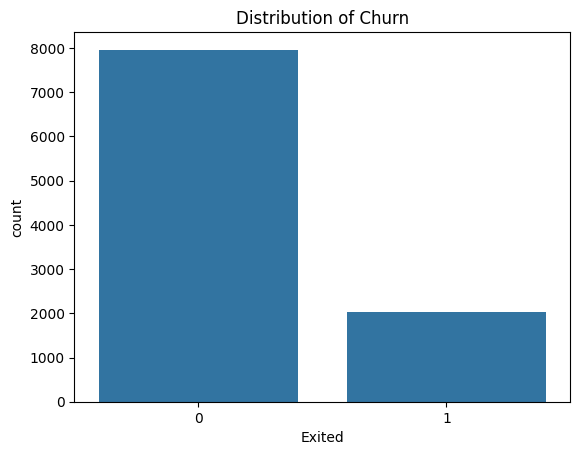

In [11]:
sns.countplot(x="Exited", data=df)
plt.title("Distribution of Churn")

Text(0.5, 1.0, 'Age Distribution')

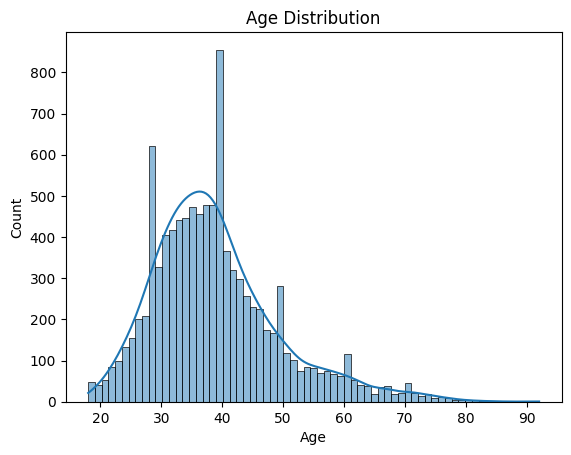

In [12]:
sns.histplot(data=df, x="Age", kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Credit Score vs Age')

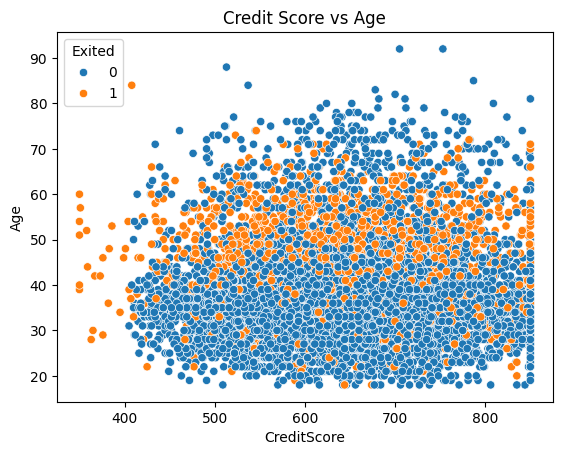

In [13]:
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="Exited")
plt.title("Credit Score vs Age")

Text(0.5, 1.0, 'Balance Distribution by Churn')

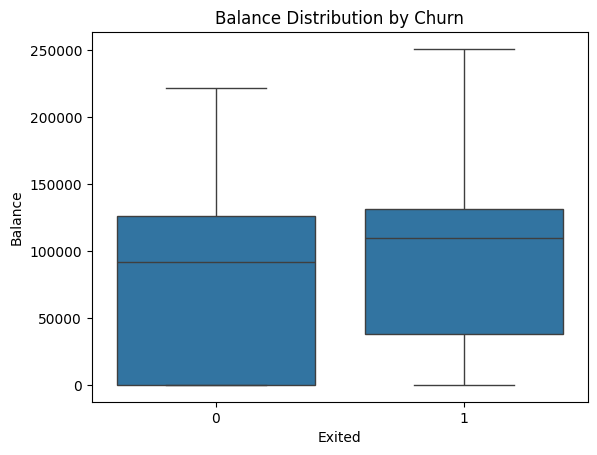

In [14]:
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance Distribution by Churn")

Text(0.5, 1.0, 'Credit Score didtribution by Churn')

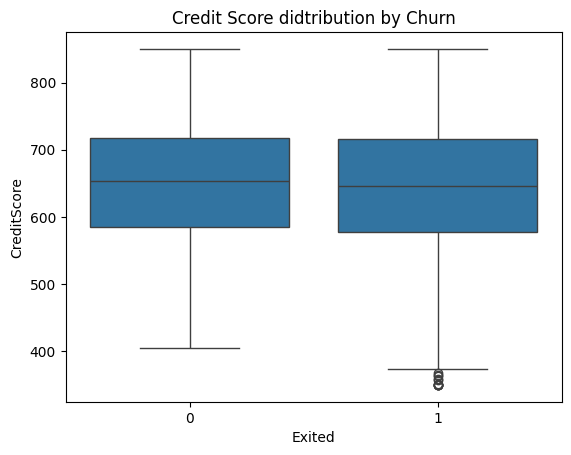

In [15]:
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.title("Credit Score didtribution by Churn")

In [16]:
features = df.drop("Exited", axis=1)

In [17]:
features

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [18]:
target = df["Exited"]

In [19]:
target

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [20]:
features = features.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [21]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [22]:
features = features.dropna()

In [23]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [24]:
#One hot encoding, catagorical variable into binary formats bc ML models require numerical model
features = pd.get_dummies(features, columns=["Geography", "Gender"])

In [25]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


#**Model Training using Scikit-learn Library**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

In [30]:
X_train[1]

array([-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
        0.64920267,  0.97481699,  1.6612541 , -0.99850112,  1.72572313,
       -0.57638802, -0.91324755,  0.91324755])

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [32]:
lr_model = LogisticRegression(random_state=42)

In [33]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
lr_predictions = lr_model.predict(X_test)

In [35]:
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [37]:
lr_accuracy

0.811

In [38]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    print("=======================")

    with open(filename, 'wb') as file:
        pickle.dump(model, file)

    print(f"Model saved to {filename}")

In [39]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "dt_model.pkl")

rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, "nb_model.pkl")

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, "knn_model.pkl")

svm_model = SVC(random_state=42)
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, "svm_model.pkl")


DecisionTreeClassifier Accuracy: 0.7850

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.51      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.79      0.79      2000

Model saved to dt_model.pkl
RandomForestClassifier Accuracy: 0.8645

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Model saved to rf_model.pkl
GaussianNB Accuracy: 0.8185

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1607
 

In [40]:
feature_importances = dt_model.feature_importances_
feature_names = features.columns

In [41]:
feature_importances

array([0.13766021, 0.21889872, 0.07203988, 0.15468898, 0.12053897,
       0.01172238, 0.06837782, 0.15827581, 0.0086141 , 0.0222269 ,
       0.00961459, 0.00625996, 0.01108168])

In [42]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [43]:
import pandas as pd
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

In [44]:
feature_importances_df

,feature,importance
0,CreditScore,0.137660
1,Age,0.218899
2,Tenure,0.072040
3,Balance,0.154689
4,NumOfProducts,0.120539
5,HasCrCard,0.011722
6,IsActiveMember,0.068378
7,EstimatedSalary,0.158276
8,Geography_France,0.008614
9,Geography_Germany,0.022227


In [45]:
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

In [46]:
feature_importances_df

,feature,importance
1,Age,0.218899
7,EstimatedSalary,0.158276
3,Balance,0.154689
0,CreditScore,0.137660
4,NumOfProducts,0.120539
2,Tenure,0.072040
6,IsActiveMember,0.068378
9,Geography_Germany,0.022227
5,HasCrCard,0.011722
12,Gender_Male,0.011082


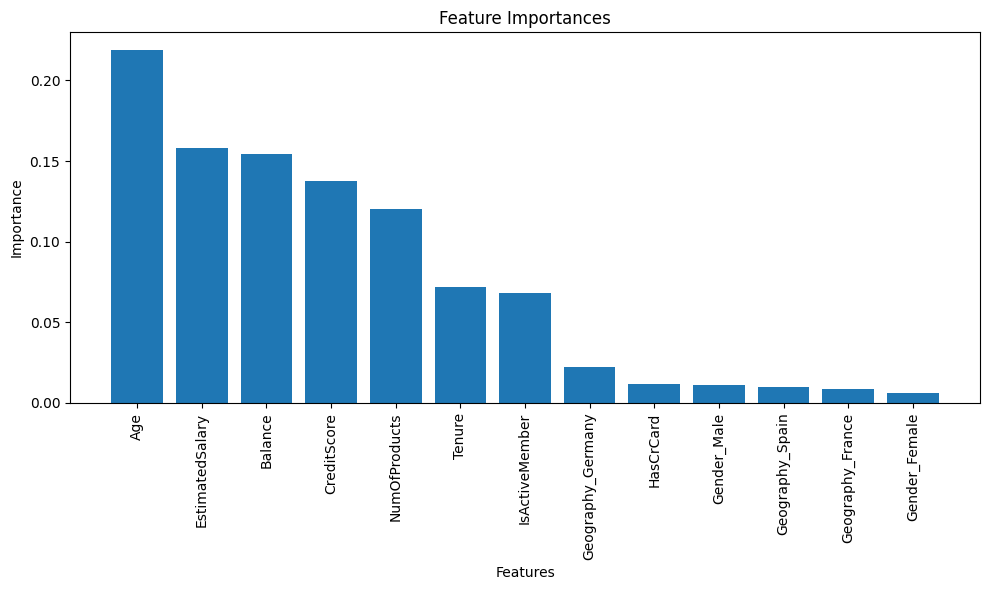

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['feature'],
        feature_importances_df['importance'])
plt.xticks(rotation=90),
plt.xlabel('Features'),
plt.ylabel('Importance'),
plt.title('Feature Importances'),
plt.tight_layout(),
plt.show()

In [48]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [49]:
features['Age_x_Balance'] = features['Age'] * features['Balance']

In [50]:
features['Products_x_Balance'] = features['NumOfProducts'] * features['Balance']

In [51]:
features['Salary_x_CreditScore'] = features['EstimatedSalary'] * features['CreditScore']

In [52]:
features['CreditScore_Age_Ratio'] = features['CreditScore'] / (features['Age'] + 1)

In [53]:
credit_threshold = 600
features['IsLowCreditScore'] = (features['CreditScore'] < credit_threshold).astype(int)

In [54]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_x_Balance,Products_x_Balance,Salary_x_CreditScore,CreditScore_Age_Ratio,IsLowCreditScore
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.00,0.00,62734956.72,14.395349,0
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,3436122.26,83807.86,68425888.64,14.476190,0
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,6705753.60,478982.40,57193648.14,11.674419,1
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.00,0.00,65584814.37,17.475000,0
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,5396965.26,125510.82,67221485.00,19.318182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.00,0.00,74224663.44,19.275000,0
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,2007936.35,57369.61,52477081.32,14.333333,1
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.00,0.00,29838676.22,19.162162,0
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,3153163.02,150150.62,71709937.44,17.953488,0


In [55]:
features = pd.get_dummies(features, drop_first=True)

In [56]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_x_Balance,Products_x_Balance,Salary_x_CreditScore,CreditScore_Age_Ratio,IsLowCreditScore
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.00,0.00,62734956.72,14.395349,0
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,3436122.26,83807.86,68425888.64,14.476190,0
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,6705753.60,478982.40,57193648.14,11.674419,1
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.00,0.00,65584814.37,17.475000,0
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,5396965.26,125510.82,67221485.00,19.318182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.00,0.00,74224663.44,19.275000,0
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,2007936.35,57369.61,52477081.32,14.333333,1
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.00,0.00,29838676.22,19.162162,0
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,3153163.02,150150.62,71709937.44,17.953488,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [58]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_x_Balance,Products_x_Balance,Salary_x_CreditScore,CreditScore_Age_Ratio,IsLowCreditScore
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True,0.00,0.00,1.228580e+08,20.787879,0
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True,5024233.20,239249.20,1.238586e+08,14.697674,0
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True,2753758.08,114739.92,4.801308e+07,22.360000,1
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False,3662199.00,135637.00,8.587810e+07,20.035714,1
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True,7960249.92,142147.32,2.041532e+07,9.070175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True,3764487.96,69712.74,5.328465e+07,13.963636,0
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False,0.00,0.00,4.818330e+05,11.559322,0
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False,0.00,0.00,6.778179e+07,18.846154,0
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True,8179780.78,190227.46,6.503786e+07,15.159091,0


In [59]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "decision_tree_featureengineered_model.pkl")

DecisionTreeClassifier Accuracy: 0.7995

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1607
           1       0.49      0.51      0.50       393

    accuracy                           0.80      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000

Model saved to decision_tree_featureengineered_model.pkl


The above was feature engineering, now let see if it has improvement using SMOTE

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
smote = SMOTE(random_state=42)

In [62]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [63]:
evaluate_and_save_model(dt_model, X_resampled, X_test, y_resampled, y_test, "decisionTree-SMOTE.pkl")

DecisionTreeClassifier Accuracy: 0.7890

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1607
           1       0.47      0.56      0.51       393

    accuracy                           0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.81      0.79      0.80      2000

Model saved to decisionTree-SMOTE.pkl


#**Model Training using PYTORCH Library**

In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

In [94]:
# Convert X_train and X_test directly
X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))

# Convert y directly
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Wrap into datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


In [95]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [96]:
class ChurnClassifierNet(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.01),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.01),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.01),

            nn.Linear(64, 2)  # raw logits
        )

    def forward(self, x):
        return self.layers(x)

In [97]:
input_size = X_train_tensor.shape[1]
pytorch_model = ChurnClassifierNet(input_size)

criterion = nn.CrossEntropyLoss()
patience = 30
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.0005)

In [101]:
for epoch in range(120):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = pytorch_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 10, Loss: 0.4752
Epoch 20, Loss: 0.4329
Epoch 30, Loss: 0.3547
Epoch 40, Loss: 0.4309
Epoch 50, Loss: 0.2848
Epoch 60, Loss: 0.4781
Epoch 70, Loss: 0.2777
Epoch 80, Loss: 0.2774
Epoch 90, Loss: 0.3514
Epoch 100, Loss: 0.3941
Epoch 110, Loss: 0.4752
Epoch 120, Loss: 0.3165


In [99]:
def evaluate_and_save_model(model, test_loader, y_test, filename):
    model.eval()
    y_pred = []

    with torch.no_grad():
        for inputs, _ in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.numpy())

    if isinstance(y_test, torch.Tensor):
        y_test_np = y_test.numpy()
    else:
        y_test_np = y_test

    accuracy = accuracy_score(y_test_np, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test_np, y_pred)}")
    print("=======================")

    torch.save(model.state_dict(), filename)
    print(f"Model saved to {filename}")


In [102]:
evaluate_and_save_model(
    model=pytorch_model,
    test_loader=test_loader,
    y_test=y_test_tensor,
    filename='NeuralNetModel.pkl'
)


ChurnClassifierNet Accuracy: 0.8335

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1607
           1       0.67      0.30      0.41       393

    accuracy                           0.83      2000
   macro avg       0.76      0.63      0.66      2000
weighted avg       0.81      0.83      0.81      2000

Model saved to NeuralNetModel.pkl
